In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline
from IPython.display import Image
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 5, 3

# Matplotlib

Matplotlib is a plotting library for Python and Numpy.


https://matplotlib.org/

# Basic Matplotlib Vocab

## Figure
The whole figure.


## Axes
The plots within the figure

<b> Axes has nothing to do with the axis!  Each subplot within the figure is called an axes. </b>



Text(400,-25,'We are the axes')

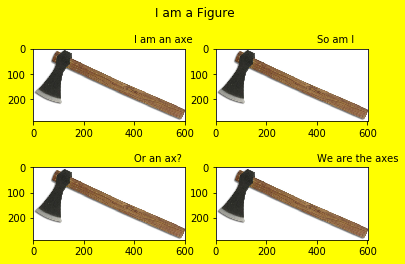

In [3]:
# Parts of a figure (don't worry about the code)
img=mpimg.imread('http://bit.ly/1PXdbg8')
fig = plt.figure()
fig.patch.set_facecolor("yellow")

fig.suptitle("I am a Figure")

axe1 = fig.add_subplot(221)
axe2 = fig.add_subplot(222)
axe3 = fig.add_subplot(223)
axe4 = fig.add_subplot(224)

axe1.imshow(img)
axe2.imshow(img)
axe3.imshow(img)
axe4.imshow(img)

axe1.text(400, -25, "I am an axe")
axe2.text(400, -25, "So am I")
axe3.text(400, -25, "Or an ax?")
axe4.text(400, -25, "We are the axes")



# The Matplotlib Hierarchy

## Interactive Pyplot Interface

Using pyplot interactively, simple functions are used to add plot elements to the current axes in the current figure.  Matplotlib keeps track of the current figure and plotting area and sends commands to the active plotting area.

Here, you work directly on a single plot, named plt.  The first time plt is used, a new plot is generated.  Each function called will make changes to this plot until it is displayed (or sent to an output file).  Then, the next time plt is referenced, a new plot will be generated.



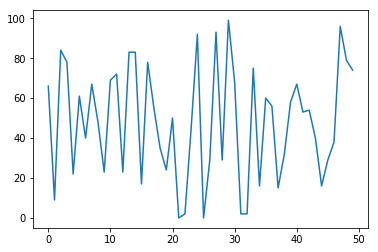

In [4]:
# make some random data
data = np.random.randint(0, 100, 50)

# plot these data points
plt.plot(data)

# show the plot and remove it from memory
plt.show()

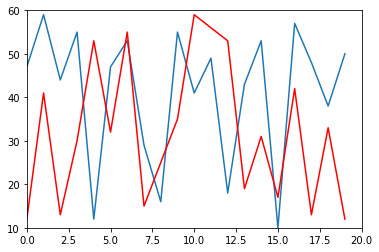

In [5]:
plt.plot(np.random.randint(10, 60, 20))

# change axis limits
plt.axis([0, 20, 10, 60])

# add another data series
plt.plot(np.random.randint(10, 60, 20), color="red")

plt.show()

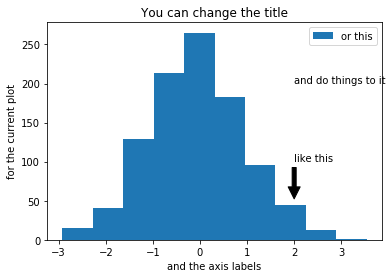

In [6]:
plt.hist(np.random.normal(0, 1, 1000))
plt.title("You can change the title")
plt.xlabel("and the axis labels")
plt.ylabel("for the current plot")
plt.text(2, 200, "and do things to it")
plt.annotate('like this', xy=(2, 50), xytext=(2, 100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.legend(['or this'])
plt.show()

In [7]:
# after plt.show() everything is cleared from the current plot
plt.show()

## Object-oriented Interface


With the pyplot OO interface each figure is a seperate object with a name, so you can work on several figures simultaneously. This can be used for non-interactive scripting.  Pyplot is used for some basic functions, like starting a new figure, but each part of the figure is controlled by the user.

The OO pyplot interface is probably the most practical way to use matplotlib in a script or pipeline.


In [8]:
# Generate some figures
ihaveaname = plt.figure()
anotherfigure = plt.figure()
andonemore = plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
# Add some axes
iamsubplot1 = ihaveaname.add_subplot(111)
iamsubplot2 = anotherfigure.add_subplot(121)
iamsubplot3 = anotherfigure.add_subplot(122)
iamsubplot4 = andonemore.add_subplot(111)

In [10]:
# You can plot on all the axes using their names

data1 = np.random.randint(0, 100, 50)
data2 = np.random.randint(0, 100, 50)
data3 = np.random.normal(1, 1, 100)
data4 = [1] * 10

In [11]:
iamsubplot1.plot(data1)
iamsubplot2.plot(data2)
iamsubplot3.plot(data3)
iamsubplot4.plot(data4)

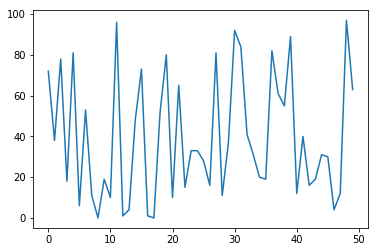

In [12]:
ihaveaname

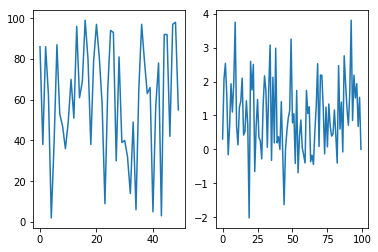

In [13]:
anotherfigure

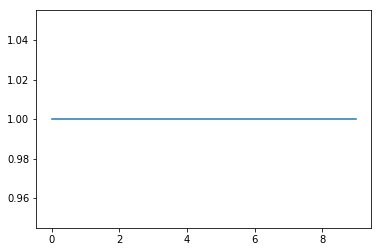

In [14]:
andonemore

## Object-oriented Class Library

Matplotlib provides a library of classes which pyplot calls.  However, you can also use a purely object oriented apporach and explicitly create and keeps track of the objects.  The main difference is in generating the figure, canvas and axes objects.

The imports are different for a purely OO approach:

In [15]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

To generate a blank figure:

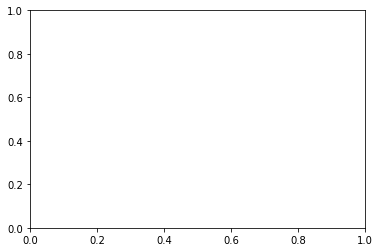

In [16]:
# Using OO only

# Generate a figure
sample_oo = Figure()

# Generate a canvas
canvas = FigureCanvas(sample_oo)

# add axes
plot_oo = sample_oo.add_subplot(111)

sample_oo

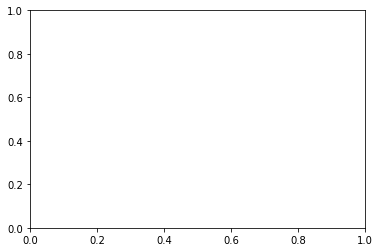

In [17]:
# Compared to using pyplot

# Generate a figure
sample_pyplot = plt.figure()

# add axes
plot_pyplot = sample_pyplot.add_subplot(111)



### Pylab

Developed to provide a MATLAB like interface to matplotlib.  Simpler and requires less typing but less powerful than pyplot.  No longer recommended in matplotlib docs.

# Drawing Plots - Plotting Commands 

Matplotlib provides various plotting commands to draw standard types of plot.  These can be used directly with numpy arrays.

There are lots of these, they are included in this list - http://matplotlib.org/1.3.1/api/pyplot_summary.html

But here are some examples (using the basic interactive interface) ....

## Line Graph

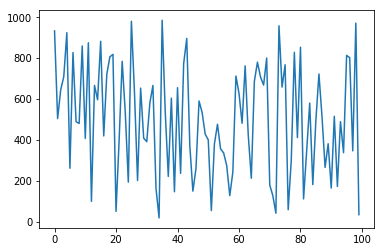

In [18]:
datapoints = np.random.randint(0, 1000, 100)

plt.plot(datapoints)

## Bar Chart

<BarContainer object of 15 artists>

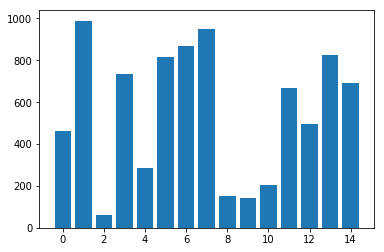

In [19]:
datapoints = np.random.randint(0, 1000, 15)
n = range(len(datapoints))
plt.bar(n, datapoints)

## Scatter Plot

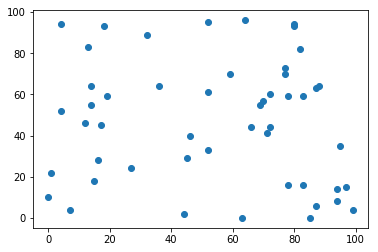

In [20]:
datapoints1 = np.random.randint(0, 100, 50)
datapoints2 = np.random.randint(0, 100, 50)
plt.scatter(datapoints1, datapoints2)

## Pie Chart

(-1.1261737038055792,
 1.1012463758347542,
 -1.1111913277583647,
 1.1111913331220848)

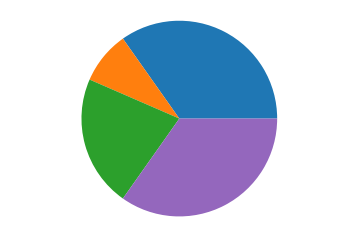

In [21]:
datapoints = np.random.randint(0, 10, 5)
plt.pie(datapoints)
plt.axis('equal')

If you so wish, you can make xkcd style plots.....

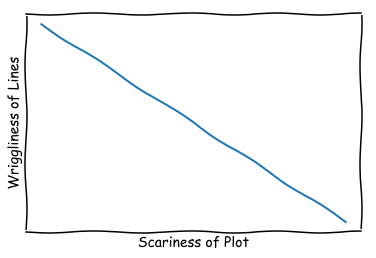

In [22]:
with plt.xkcd():
    plt.plot([1, 10], [10, 1])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Scariness of Plot")
    plt.ylabel("Wriggliness of Lines")


# Customising Plots - Artists

Matplotlib becomes a lot more powerful when you can customise the plots - this allows you to build any type of plot you might need.



To build a figure, matplotlib uses three layers - the canvas, the renderer and the artists.  As the user, usually you only interact with the artists.

## Canvas
The area onto which the figure is drawn

## Renderer
Draws the figure

## Artist
Knows how to use the renderer to draw the figure then put it on the canvas.

There are two types of artist:
### Primitives
Graphical objects to put onto the canvas e.g. line, rectangle, text.  All the plots are made of combinations of these, so it is easy to change their attributes.

### Containers
Places to put the primatives - the Figure, Axes, Axis and the ticks on the axis.

The matplotlib docs refer to the plotting functions as "Axes helper methods for creating primitive Artists and adding them to their respective containers".  In other words, the plotting functions just provide defaults for generating and placing your artists on your axes, you can then change almost everything about them.  You can also generate and place them yourself, giving you more control over the plot.


In [23]:
# Ignore the code here (but, look, you can make nice pictures using matplotlib!)
pen = mpimg.imread("http://bit.ly/1PZqUSc")
paper = mpimg.imread("http://bit.ly/1TyGZ3L")
hand = mpimg.imread("http://bit.ly/1TFui8F")

fig = plt.figure()
fig.suptitle("As far as I understand...")
a = fig.add_subplot(111)
a.axis('off')

papimg = fig.add_axes([0.2,0.2,0.3,0.3])
papimg.set_xticks([])
papimg.set_yticks([])
papimg.axis('off')
papimg.imshow(paper)
papimg.text(0, -10, "canvas")

penimg = fig.add_axes([0.4,0.4,0.3,0.3])
penimg.set_xticks([])
penimg.set_yticks([])
penimg.axis('off')
penimg.imshow(pen)
penimg.text(0, 0, "renderer")

handimg = fig.add_axes([0.6,0.4,0.3,0.3])
handimg.set_xticks([])
handimg.set_yticks([])
handimg.axis('off')
handimg.imshow(hand)
handimg.text(400, -10, "artist")

HTTPError: HTTP Error 404: Not Found

# Containers - Axes

Axes are an artist and a container.

If you want a standard set of axes (i.e. you want one plot or to divide the figure into evenly sized sections), the axes can be specified using figure.add_subplot(nnn) where nnn represents 3 integers.

These integers are, in order, the number of plots of the x axis, the number of plots on the y axis and which plot you are working on.

So....

Text(0.4,0.5,'111')

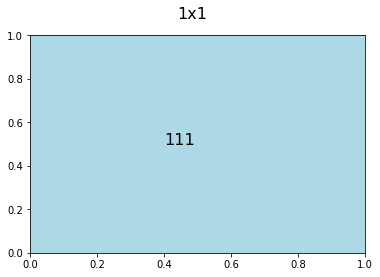

In [24]:
fig = plt.figure()
oneplot = fig.add_subplot('111')
oneplot.patch.set_facecolor("lightblue")
fig.suptitle("1x1", size=16)
oneplot.text(0.4, 0.5, "111", size=16)


Text(0.5,0.98,'1x2')

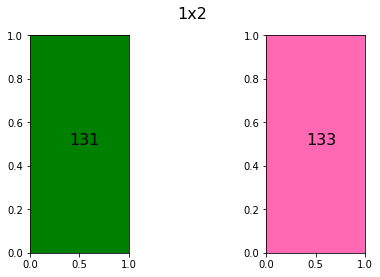

In [25]:
fig = plt.figure()
twoplots121 = fig.add_subplot('131')
twoplots122 = fig.add_subplot("133")

twoplots121.patch.set_facecolor("green")
twoplots121.text(0.4, 0.5, "131", size=16)

twoplots122.patch.set_facecolor("hotpink")
twoplots122.text(0.4, 0.5, "133", size=16)

fig.suptitle("1x2", size=16)


Text(0.5,0.98,'2x1')

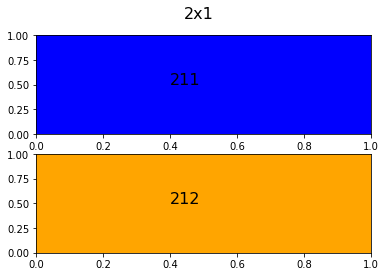

In [26]:
fig = plt.figure()
twoplots211 = fig.add_subplot('211')
twoplots212 = fig.add_subplot("212")

twoplots211.patch.set_facecolor("blue")
twoplots211.text(0.4, 0.5, "211", size=16)

twoplots212.patch.set_facecolor("orange")
twoplots212.text(0.4, 0.5, "212", size=16)

fig.suptitle("2x1", size=16)

Text(0.5,0.98,'2x1')

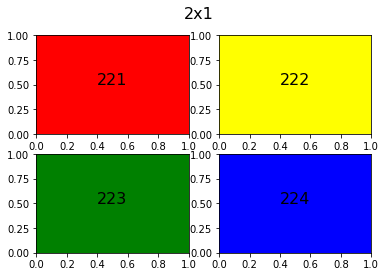

In [27]:
fig = plt.figure()
fourplots221 = fig.add_subplot('221')
fourplots222 = fig.add_subplot("222")
fourplots223 = fig.add_subplot("223")
fourplots224 = fig.add_subplot("224")

fourplots221.patch.set_facecolor("red")
fourplots221.text(0.4, 0.5, "221", size=16)

fourplots222.patch.set_facecolor("yellow")
fourplots222.text(0.4, 0.5, "222", size=16)

fourplots223.patch.set_facecolor("green")
fourplots223.text(0.4, 0.5, "223", size=16)

fourplots224.patch.set_facecolor("blue")
fourplots224.text(0.4, 0.5, "224", size=16)

fig.suptitle("2x1", size=16)

# Containers - Axis
The axis are another container which you can control.

The axis controls the ticks, grid lines, tick labels and axis labels.

They are accessed individually as plt.xaxis and plt.yaxis.

Axis limits are set directly using plt.axis([xmin, xmax, ymin, ymax]), e.g. plt.axis([2, 4, 10, 20]) would have an x axis ranging from 2 to 4 and a y axis ranging from 10 to 20. 

Other attributes can be set using various set_xxx options.

plt.grid can be turned on and off and its attributes can be changed.


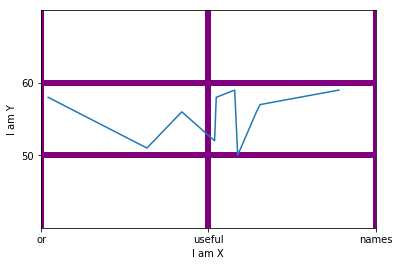

In [28]:
fig = plt.figure()
a = fig.add_subplot('111')

a.plot(sorted(np.random.randint(1, 1000, 10)), np.random.randint(50, 60, 10))
# Set the axis limits
a.axis([0, 1000, 40, 70])

# Choose which ticks you want to see
a.xaxis.set_ticks([1, 500, 1000])
a.yaxis.set_ticks([50, 60])

# Label the Axis
a.xaxis.set_label_text("I am X")
a.yaxis.set_label_text("I am Y")

# Change the labels
a.xaxis.set_ticklabels(["or", "useful", "names"])

# I wish my gridlines were giant and purple
a.grid('on', color="purple", linewidth=6)

# Containers - Ticks
The tick marks on the axis are also containers and artists.  These containers are within the axis containers.

Inside the tick containers you can control the formatting of the lines and the text on the ticks.

On the x axis, tick1line and label1 are the tick and label at the bottom of the plot, tick2line and label2 at the top.

On the y axis, tick1line and label1 are the left and tick2line and label2 the right.

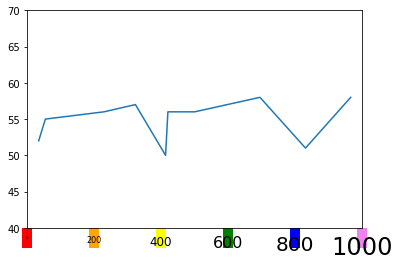

In [29]:
fig = plt.figure()
a = fig.add_subplot('111')

a.plot(sorted(np.random.randint(1, 1000, 10)), np.random.randint(50, 60, 10))
a.axis([0, 1000, 40, 70])
i = 0

cols = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']
for tick in a.xaxis.get_major_ticks():
    tick.tick1line.set_color(cols[i])
    tick.tick1line.set_markersize(20)
    tick.tick1line.set_markeredgewidth(10)
    i += 1
    tick.label1.set_fontsize(i * 4)
    

# Primitive Artists

Here is a full hierarchy of primitive artists available in matplotlib.  They are divided into patch, text and line.

A patch is a 2D shape with a face colour and an edge colour.  Text and line are hopefully self-explanatory.

The docs are here: http://matplotlib.org/1.3.1/api/artist_api.html

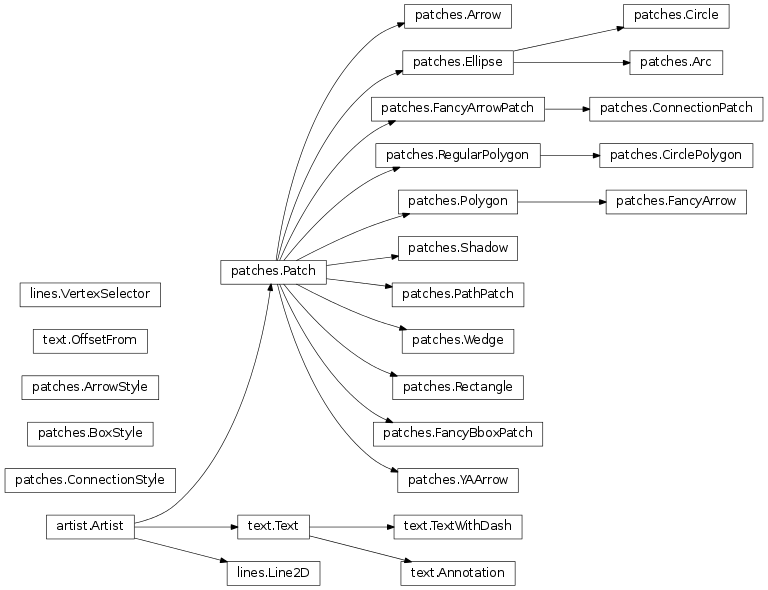

In [30]:
Image("http://matplotlib.org/1.3.1/_images/inheritance-928cd1fe4ed7e1c3f23e76e43d4643820a931699.png",
    height=300, width=450)

To use these directly you need some imports.

In [31]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.text as mtext
from matplotlib.collections import PatchCollection

Patches and lines can be added to the plot individually or as part of a collection

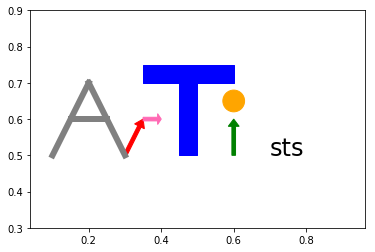

In [32]:
fig = plt.figure()
sp = fig.add_subplot("111")
sp.axis('equal')
sp.axis([0, 1, 0.3, 0.9])

# Lines: mlines.Line2D([list of x coords], [list of y coords])
sp.add_line(mlines.Line2D([0.1, 0.2], [0.5, 0.7], color='gray', lw=6))
sp.add_line(mlines.Line2D([0.2, 0.3], [0.7, 0.5], color='gray', lw=6))
sp.add_line(mlines.Line2D([0.15, 0.25], [0.6, 0.6], color='gray', lw=6))

# Arrows: mpatches.Arrow(x coord start, y coord start, x distance, y distance)
sp.add_patch(mpatches.Arrow(0.3, 0.5, 0.05, 0.1, width=0.05, color="red"))
sp.add_patch(mpatches.Arrow(0.6, 0.5, 0, 0.1, width=0.05, color="green"))
sp.add_patch(mpatches.Arrow(0.35, 0.6, 0.05, 0, width=0.05, color="hotpink"))

patchlist = []
# Rectangles: mpatches.Rectangle([bottom left x coord, bottom left y coord], width, height)
patchlist.append(mpatches.Rectangle([0.45, 0.5], 0.05, 0.2, color="blue"))
patchlist.append(mpatches.Rectangle([0.35, 0.7], 0.25, 0.05, color="blue"))

# Circles: mpatches.Circle([middle x coord, middle y coord], diameter)
patchlist.append(mpatches.Circle([0.6, 0.65], 0.03, color="orange"))

# Text: mtext.Text([bottom left x coord, bottom left y coord], text).  Note: add_artist not add_text
# Text can't be part of a patch collection (but lines can) 
sp.add_artist(mtext.Text(0.7, 0.5, 'sts', size=24, color="black"))

cols = ['blue', 'blue', 'orange']
collection = PatchCollection(patchlist, cols)
sp.add_collection(collection)

# Combining Artists

The predefined plot types are just combinations of data and artists:

In [33]:
f = plt.figure()
somedata = np.random.randint(0, 100, 50)

<Figure size 432x288 with 0 Axes>

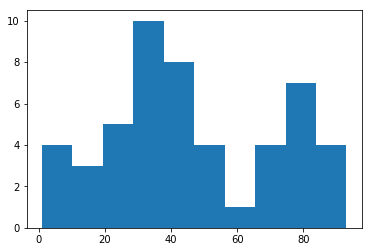

In [34]:
sp = f.add_subplot('111')
my_histogram = sp.hist(somedata)
f

In [35]:
#  The histogram is a tuple of length 3
print type(my_histogram), len(my_histogram)

SyntaxError: invalid syntax (<ipython-input-35-bcaf71e5b9b0>, line 2)

In [ ]:
# 0 is an np array of the frequencies
print type(my_histogram[0]), my_histogram[0]

# 1 is an np array of the bins
print type(my_histogram[1]), my_histogram[1]

# 2 is a list of patch objects
print type(my_histogram[2]), my_histogram[2]

In [ ]:
# Each patch is a rectangle
my_histogram[2][0]

# Colour Maps

Matplotlib also provides colour maps.  They are shown here:
http://matplotlib.org/examples/color/colormaps_reference.html

You need to import the colormap function

In [ ]:
import matplotlib.cm as cm

Colour maps are used to map colours to values.

Each index in an array is matched to a colour.

In [ ]:
# Generate some random floats
my_floats = np.random.rand(10)

# Map colours to these floats
colours = cm.spring(my_floats)

# Plot these points
plt.scatter(my_floats, [[10] * 10], s=500, color=colours)

# Example - Heatmap


Matplotlib has a heatmap plotting function (pcolor), however, this is just to demonstrate that you can build any custom plot you like.

In [ ]:
# Make a matrix of correlations
M = np.random.rand(4, 5)

# Initiate the plot
f = plt.figure()
sp = f.add_subplot('111')

sp.axis([0, M.shape[0], 0, M.shape[1]])

# Build a colour palette based on the values 
colours = cm.viridis(M)

# Map co-ordinates and values in the matrix
X = np.ndenumerate(M)

# Plot a rectangle for each value
for coords, val in X:
    R = sp.add_patch(mpatches.Rectangle([coords[0], coords[1]], 1, 1, color=colours[coords[0], coords[1]]))


In [ ]:
# Or just use the built in function

# Turn the matrix upside down and rotate it (as mpl draws heatmaps a weird way round)
M2 = np.rot90(M)
M2 = np.flipud(M2)

# Plot the heatmap
plt.pcolor(M2, cmap='viridis')

# References

- http://matplotlib.org

- http://matplotlib.org/users/artists.html - Artists

- http://matplotlib.org/faq/usage_faq.html - Hierarchy

- http://www.labri.fr/perso/nrougier/teaching/matplotlib/ 

- http://people.duke.edu/~ccc14/pcfb/numpympl/MatplotlibBasics.html
    